In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import cv2
from cselect import color as cs  # https://github.com/jutanke/cselect
import numpy as np
sys.path.append('.')

from poseestimation import model

# --- load image ---
img_path = './julian.JPG'
I = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

# -------------------------
pe = model.PoseEstimator()
positions = pe.predict(I)
# -------------------------

/home/julian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


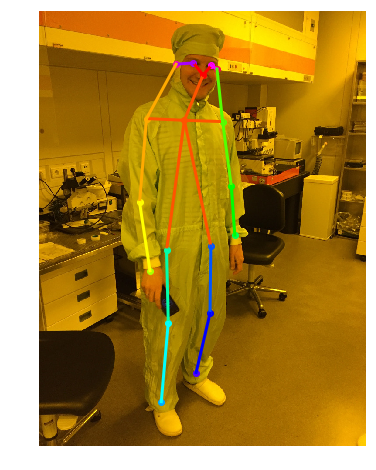

In [2]:
# --- plotting ---
DEFAULT_LIMB_SEQ = np.array(
    [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7], [1,8], [8,9],
     [9,10], [1,11], [11,12], [12,13], [1,0], [0,14], [14,16],
     [0,15], [15,17], [2,16], [5,17]], 'int32')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(I)
ax.axis('off')

colors = cs.lincolor(19)/255

for img_pos in positions[0]: # for all entities in the image
    for idx,(x,y,score) in enumerate(np.squeeze(img_pos)):
        
        ax.scatter(y,x, color=colors[idx])
        
for a, b in DEFAULT_LIMB_SEQ:
    x0, y0, _ = np.squeeze(positions[0])[a]
    x1, y1, _ = np.squeeze(positions[0])[b]
    ax.plot([y0, y1], [x0, x1], color=colors[a], linewidth=3)

plt.show()